In [1]:
import os
import numpy as np
import cdflib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import tdscdf
import tdsplot
import solocdf
import spiceypy

In [26]:
mk = 'solo_ANC_soc-flown-mk.tm'
cwd = os.getcwd()
print(cwd)
os.chdir('./data/spice/mk')
spiceypy.furnsh(mk)
t0 = '2021-08-08T20:00:00'
t1 = '2021-08-09T07:30:00'
times = t0
et = spiceypy.str2et( times )
[state, ltime] = spiceypy.spkezr('VENUS', et,  'SOLO_VSO', 'NONE', 'SOLO')
os.chdir(cwd)

/data/jupyter/VENUS


## VGAM 1

loading solo_L2_rpw-tds-surv-mamp-cdag_20201227_V06.cdf
loading solo_L2_rpw-tds-surv-rswf-e-cdag_20201227_V07.cdf
loading solo_L2_mag-srf-normal_20201227_V04.cdf
262137.5


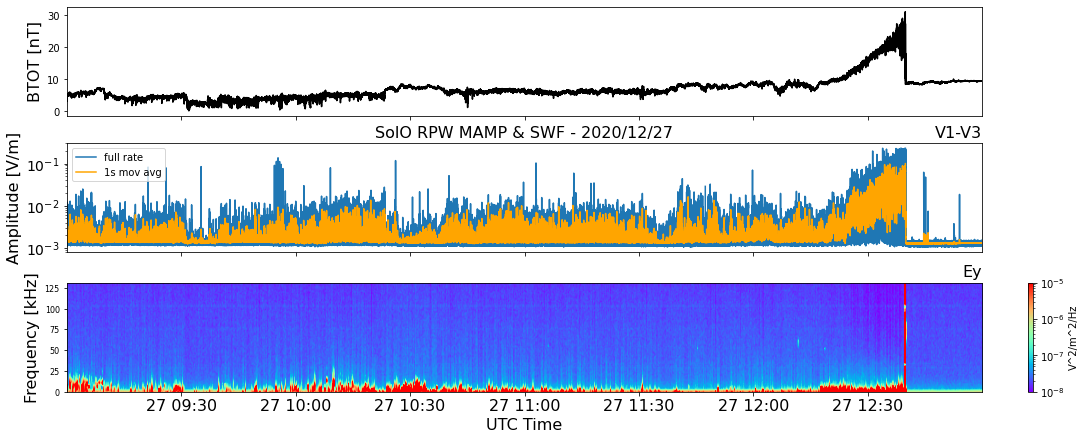

In [8]:
time = (2020, 12, 27, 9, 0, 0)
tlen = 4 *3600

mamp = tdscdf.load_data(time, tlen=tlen, product='surv-mamp')
rswf = tdscdf.load_data(time, tlen=tlen, product='surv-rswf')
mag = solocdf.load_data(time, tlen=tlen, product='mag-srf-normal')

fig, ax = plt.subplots(3, 1, figsize=(15, 6), layout='constrained', sharex=True)

times = cdflib.cdfepoch.to_datetime(mag['EPOCH'])
B = np.sqrt(np.sum(mag['B_SRF']**2, axis=1))

ax[0].plot(times, B, c='black')
ax[0].set_ylabel('BTOT [nT]', fontsize=16)
ax[1] = tdsplot.tds_plot_mamp(ax[1], mamp, channel=0)
ax[2] = tdsplot.tds_plot_swf_spectrogram(ax[2], rswf)
plt.xticks(fontsize=16)

plt.show()   

## VGAM 2

loading solo_L2_rpw-tds-surv-mamp-cdag_20210808_V05.cdf
loading solo_L2_rpw-tds-surv-mamp-cdag_20210809_V18.cdf
loading solo_L2_rpw-tds-surv-rswf-e-cdag_20210808_V07.cdf
loading solo_L2_rpw-tds-surv-rswf-e-cdag_20210809_V05.cdf
262137.5


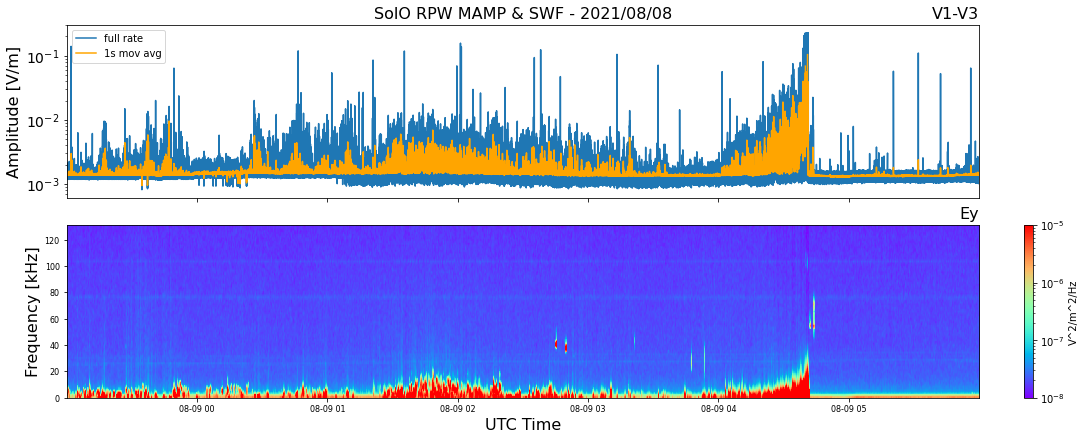

In [6]:
time = (2021, 8, 8, 23)
tlen = 7 * 3600

mamp = tdscdf.load_data(time, tlen=tlen, product='surv-mamp')
rswf = tdscdf.load_data(time, tlen=tlen, product='surv-rswf')

fig, ax = plt.subplots(2, 1, figsize=(15, 6), layout='constrained', sharex=True)

ax[0] = tdsplot.tds_plot_mamp(ax[0], mamp, channel=0)
ax[1] = tdsplot.tds_plot_swf_spectrogram(ax[1], rswf)
plt.show()   

loading solo_L2_rpw-tds-surv-mamp-cdag_20210809_V18.cdf
loading solo_L2_rpw-tds-surv-rswf-e-cdag_20210809_V05.cdf
262137.5
262137.5


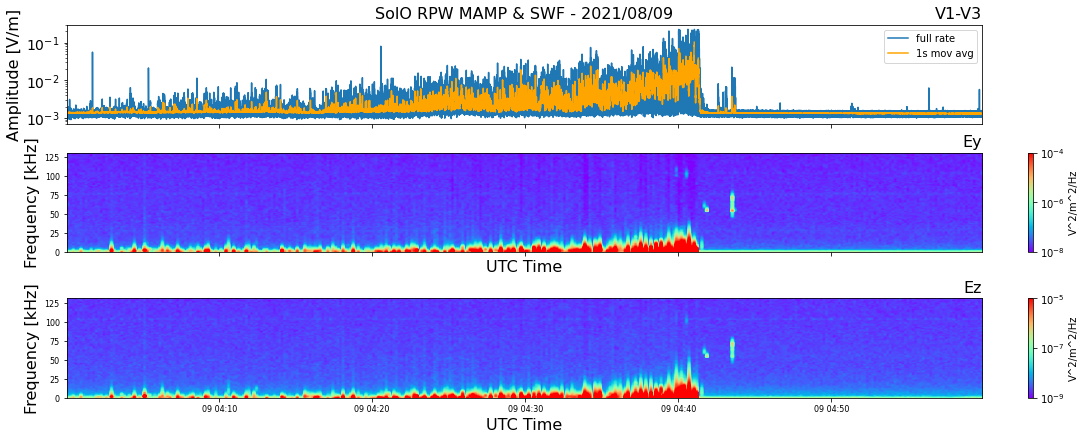

In [3]:
time = (2021, 8, 9, 4, 0)
tlen = 60 * 60

mamp = tdscdf.load_data(time, tlen=tlen, product='surv-mamp')
rswf = tdscdf.load_data(time, tlen=tlen, product='surv-rswf')

fig, ax = plt.subplots(4, 1, figsize=(15, 6), layout='constrained', sharex=True)

ax[0] = tdsplot.tds_plot_mamp(ax[0], mamp, channel=0)
ax[1] = tdsplot.tds_plot_swf_spectrogram(ax[1], rswf)
ax[2] = tdsplot.tds_plot_swf_spectrogram(ax[2], rswf, channel=1)

plt.show()  

# VGAM 3

## TDS SBM1-RSWF for VGAM3

loading solo_L2_rpw-tds-sbm1-rswf-e-cdag_20220904T011721-20220904T012920_V02.cdf
loading solo_L2_mag-srf-normal_20220904_V01.cdf
262137.5


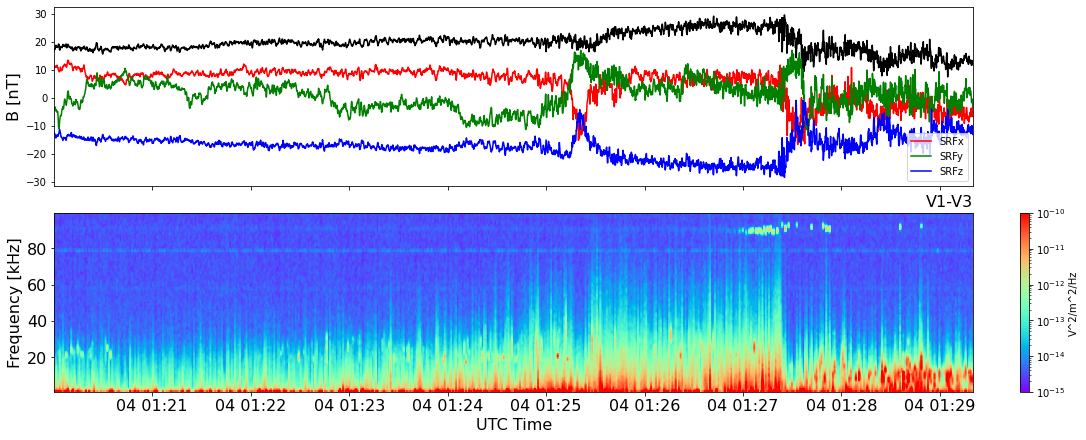

In [2]:
time = (2022, 9, 4, 1, 20)
tlen = 10 * 60

rswf = tdscdf.load_data(time, tlen=tlen, product='sbm1-rswf')
mag = solocdf.load_data(time, tlen=tlen, product='mag-srf-normal')
fig, ax = plt.subplots(2, 1, figsize=(15, 6), layout='constrained', sharex=True)
times = cdflib.cdfepoch.to_datetime(mag['EPOCH'])
B = np.sqrt(np.sum(mag['B_SRF']**2, axis=1))
ax[0].plot(times, B, c='black')
ax[0].plot(times, mag['B_SRF'][:, 0], c='red', label='SRFx')
ax[0].plot(times, mag['B_SRF'][:, 1], c='green', label='SRFy')
ax[0].plot(times, mag['B_SRF'][:, 2], c='blue', label='SRFz')
ax[0].legend()
ax[0].set_ylabel('B [nT]', fontsize=16)
ax[1] = tdsplot.tds_plot_swf_spectrogram(ax[1], rswf, channel=0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()   
